In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime, sys, re, os
import pandas as pd

In [2]:
import csky as cy
import astropy
import healpy as hp
import histlite as hl
cy.plotting.mrichman_mpl()
soft_colors = cy.plotting.soft_colors

In [3]:
import matplotlib as mpl

In [4]:
job_base='baseline_analysis'
repo = cy.selections.Repository(
        '/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/', '/data/user/smancina/ESTES_DataSet',  username='shiqiyu')
base_dir = cy.utils.ensure_dir('/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/analyses/{}'.format(job_base))

In [5]:
plot_dir = cy.utils.ensure_dir('/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/plotting/plots')

In [6]:
specs = cy.selections.ESTESDataSpecs.ESTES_2011_2020_pass2_0
ana = cy.get_analysis(repo, 'version-p001-p00', specs,
                        space_bg_kw = {'mc_weight':'bg_weight'}, energy_kw = {'bg_from_mc_weight': 'bg_weight'}, load_sig = True)


Setting up Analysis for:
ESTES_2011_2020_pass2_0
Setting up ESTES_2011_2020_pass2_0...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/MC_All_Combined.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2011_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2012_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2013_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2014_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2015_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2016_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2017_exp.npy ...
Reading /home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/version-p001-p00/IC86_2

In [7]:
base_dir = '/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/analyses/baseline_analysis/'

In [8]:
pl_fluxs = np.load(base_dir + 'ps/trials/ESTES/ps_sens_nss_corona_powerlaw_nofit.npy')
pl_decs = np.load(base_dir + 'ps/trials/ESTES/ps_sens_decs_corona_powerlaw_nofit.npy')

corona_decs = np.load(base_dir + 'ps/trials/ESTES/ps_sens_decs_corona_flux_nofit.npy')
corona_fluxs = np.load(base_dir + 'ps/trials/ESTES/ps_sens_nss_corona_flux_nofit.npy')


In [17]:
corona_fluxs

array([4.15176612, 4.08048723, 3.97739763, 4.15354585, 3.03294614,
       3.92912214, 4.02302725, 3.83741859, 4.01654413, 3.90533443,
       3.93955139, 5.82681351, 4.6260827 , 4.23895534, 4.35928559,
       3.795166  , 4.16868656, 4.1492333 , 4.06503751, 3.9085288 ,
       2.81483663, 4.10831748, 4.78639695, 5.32672511, 5.38347524,
       4.1497363 , 3.77457906, 5.97458252, 3.90595972, 3.76772546])

In [9]:
pl_decs_dp5_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_5.0sigma_decs_corona_powerlaw_nofit.npy')
pl_fluxs_dp5_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_5.0sigma_nss_corona_powerlaw_nofit.npy')


pl_decs_dp3_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_3.0sigma_decs_corona_powerlaw_nofit.npy')
pl_fluxs_dp3_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_3.0sigma_nss_corona_powerlaw_nofit.npy')


corona_decs_dp3_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_3.0sigma_decs_corona_flux_nofit.npy')
corona_fluxs_dp3_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_3.0sigma_nss_corona_flux_nofit.npy')

corona_decs_dp5_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_5.0sigma_decs_corona_flux_nofit.npy')
corona_fluxs_dp5_nofit = np.load(base_dir + 'ps/trials/ESTES/ps_dp_5.0sigma_nss_corona_flux_nofit.npy')

In [10]:
import pandas as pd

df_orig = pd.read_hdf('/data/user/qliu/Seyfert/northern_sky_seyferts/calculate_neutrino_expectation/BAT70mo_BASStables_1_3_7_8_9_10_joined_fixed_south_sy.h5')
#/cvmfs/icecube.opensciencegrid.org/users/shiqiyu/selected_xray_fullsky_seyferts.h5')
idx = np.logical_and(df_orig['DECdeg'] < -5, df_orig['DECdeg'] > -80)
idx2 = df_orig['neutrino_expectation_dnn'] >=1.21
#ind3 = df['CTPT_NAME']!="LEDA90334"
df = df_orig[idx&idx2].sort_values(by='neutrino_expectation_dnn', ascending=False).copy(deep=True)
src_decs = df['DECdeg']
src_names = df['CTPT_NAME']
src_nus = df['neutrino_expectation_estes']
src_nus_dnn = df['neutrino_expectation_dnn']



In [11]:
sum(src_nus)

22.34135675339602

In [12]:
print([src_names[29],src_nus[29],src_decs[29]])

['ESO137-34', 0.1467916466295505, -58.08]


In [13]:
preliminary = False

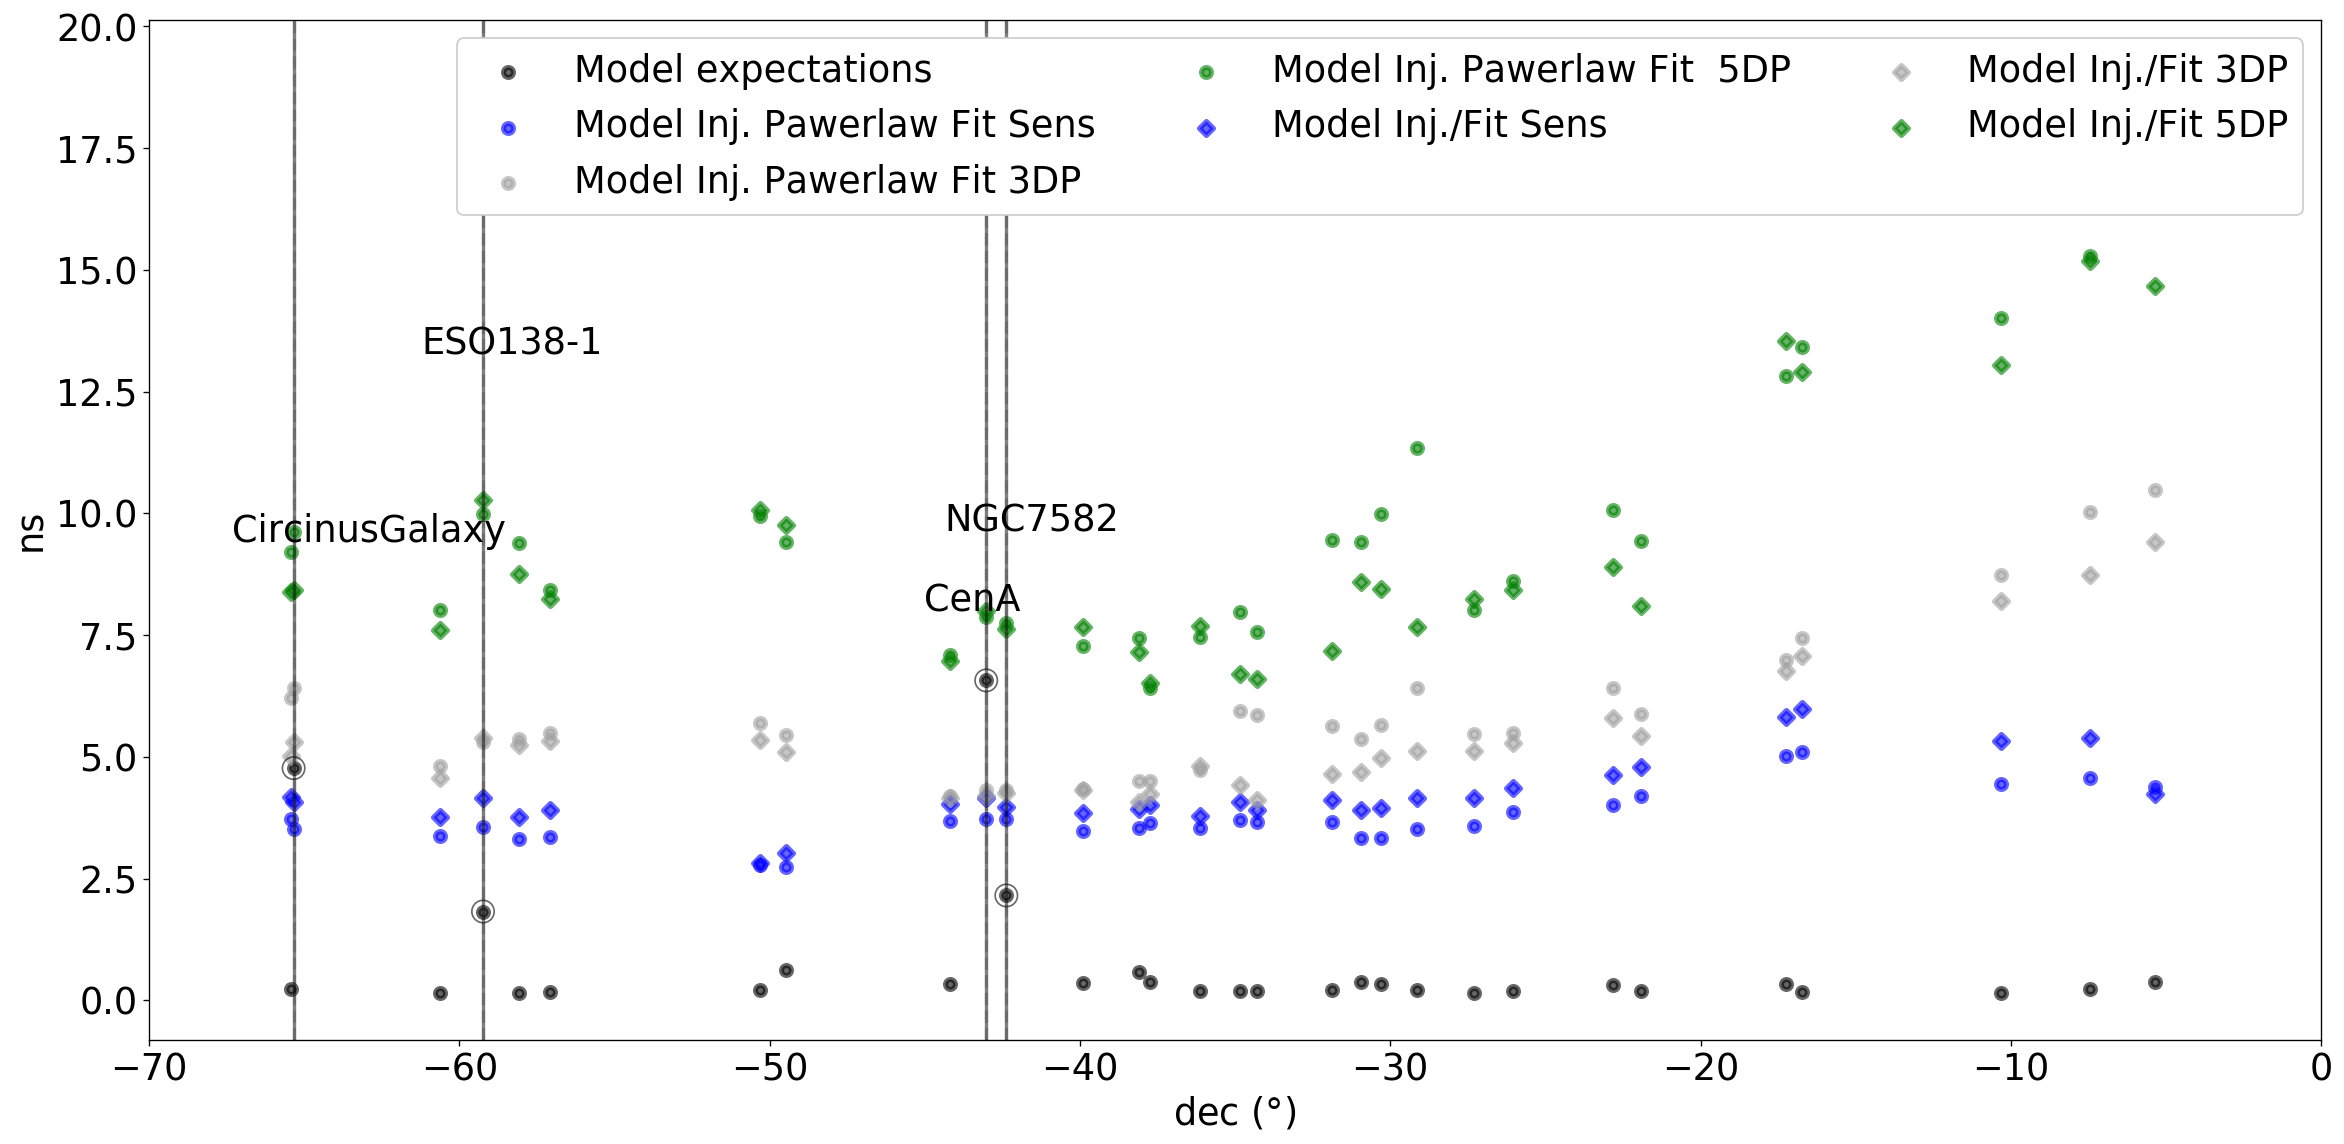

In [16]:
plt.rcParams["text.usetex"] = False
mpl.rc('font', size=22) 
alpha = 0.6
soft_colors=['blue','#a1a1a1','green'] #'#a1a1a1'
fig, ax1 = plt.subplots(figsize=(20,10)) 
#fig, (ax1, ax2) = plt.subplots (2, figsize=(12,9), gridspec_kw = {'height_ratios':[4, 1]}, sharex=True) 


ax1.scatter(src_decs, src_nus, marker='o', alpha =alpha,
             c='black', lw=3, label='Model expectations')

ax1.scatter(pl_decs, pl_fluxs, marker='o', alpha =alpha,
             c=soft_colors[0], lw=3, label='Model Inj. Pawerlaw Fit Sens')

ax1.scatter(pl_decs_dp3_nofit, pl_fluxs_dp3_nofit, marker='o', alpha =alpha,
             c=soft_colors[1], lw=3, label='Model Inj. Pawerlaw Fit 3DP')
ax1.scatter(pl_decs_dp5_nofit, pl_fluxs_dp5_nofit, marker='o', alpha =alpha,
            c=soft_colors[2], lw=3, label='Model Inj. Pawerlaw Fit  5DP')


ax1.scatter(corona_decs, corona_fluxs, marker='D',alpha =alpha,
             c=soft_colors[0], lw=3, label='Model Inj./Fit Sens')

ax1.scatter(corona_decs_dp3_nofit, corona_fluxs_dp3_nofit, marker='D',alpha =alpha,
             c=soft_colors[1], lw=3, label='Model Inj./Fit 3DP')
ax1.scatter(corona_decs_dp5_nofit, corona_fluxs_dp5_nofit, marker='D',alpha =alpha,
             c=soft_colors[2], lw=3, label='Model Inj./Fit 5DP')

#CenA -43.0191 
#srcs={"CenA":-43.0191 , "CircinusGalaxy", "ESO138-1": -59.2348, "NGC5506":  -3.2075}#, "NGC7582":-42.3706}
#src_names, src_decs
i=0

for y, dec, name in zip(src_nus[0:4], src_decs[0:4], src_names[0:4]):
    plt.axvline(x=dec,ls='--', color='gray', alpha = 0.3)
    if y>1:
        plt.axvline(x=dec,ls='-', color='black', alpha = 0.5)

        ax1.scatter(dec, y, marker='o', alpha =alpha, facecolors='none', edgecolors='black', s=180)

        plt.text(x=dec-2,y=corona_fluxs_dp5_nofit[i]+i, s=name)
    i+=1

ax1.set_xlabel (r'dec ($\degree$)')#r'$\sin(\delta)$')
ax1.set_ylabel (r'ns')
#    r'$E^2\cdot dN/dE$'
#    r' at 100 TeV'
#    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-70, 0)
#ax1.set_ylim (-2, 250)

#ax1.grid(which='major')
ax1.legend (ncol=3)

plt.tight_layout()
ax1.set_frame_on(True)
plt.savefig(plot_dir+ 'ps_sens_dps_corona_vs_gammafit.png')
#cy.plotting.saving(plot_dir, 'ps_sens_dps_corona_vs_gammafit')

In [72]:
base_dir = '/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/data/analyses/baseline_analysis/'
plot_dir = '/home/shiqiyu/analysis/wg-nu-sources/ESTES_seyfert/plotting/plots/'

In [16]:
corona_bkg = np.load(base_dir + 'ps/trials/ESTES/bg_chi2corona.dict', allow_pickle=True)
pl_bkg = np.load(base_dir + 'ps/trials/ESTES/corona_powerlaw/bg_chi2coronafluxpowerlawfit.dict', allow_pickle=True)

In [60]:
def plot_ps_bkg(dec, name):
    b = cy.dists.Chi2TSD(corona_bkg['dec'][dec])
    bpl = cy.dists.Chi2TSD(pl_bkg['dec'][dec])
    
    title = '{} BKG PS: {} ($\delta$ = {:.2f})'.format(b.n_total, name, dec)

    fig, ax = plt.subplots(figsize=(12,8))
    h = b.get_hist(bins=30)
    hpl = bpl.get_hist(bins=30)
    
    hl.plot1d(ax, h, crosses=True,
              label='Seyfert bg trials')
    hl.plot1d(ax, hpl, crosses=True,
              label='Power law fit bg trials')
    
    x = h.centers[0]
    norm = h.integrate().values
    xpl = hpl.centers[0]
    normpl = hpl.integrate().values
    
    ax.semilogy(x, norm * b.pdf(x), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(b.ndof, b.eta))
    ax.semilogy(xpl,normpl*bpl.pdf(xpl), lw=2, ls='--',
                label=r'$\chi^2[{:.2f}\sf{{dof}},\ \eta={:.3f}]$'.format(bpl.ndof, bpl.eta))
    ax.set_xlabel(r'TS')
    ax.set_ylabel(r'number of trials')
    ax.set_title(title)
    #ax.axvline(b.isf_nsigma(5), c='r', ls = '--', label='5$\sigma$ (From Fit)')
    #ax.axvline(b.isf_nsigma(3), c='r', ls = ':', label='3$\sigma$ (From Fit)')
    ax.legend()
    plt.tight_layout()
    #plt.show()
    cy.plotting.saving(cy.utils.ensure_dir(plot_dir + '/ps/bkg'), 'ps_bkg_corona_powerlaw_{}'.format(name))
    plt.close()

In [61]:
for dec, name in zip(src_decs, src_names):
    plot_ps_bkg(np.round(dec,3), name)


-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_CenA
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_CircinusGalaxy
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_NGC7582
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_ESO138-1
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_NGC4945
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_NGC424
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_NGC5643
-> /home/shiqiyu/analysis/wg-nu-sources/2021_DNNCascade_Analyses/plotting/plots//ps/bkg/ps_bkg_corona_powerlaw_NGC4507
-> /home/shiqiyu/analysis/wg-nu-sources/2021

KeyError: -10.324

In [ ]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]


conf= {
'src' : cy.utils.Sources(dec=0, ra=0, deg=False),
'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
        }
tr = (cy.get_trial_runner(ana=ana, conf=conf))
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n in nss]

In [18]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]
trs = []
for dec in np.arcsin(estes_sd):
    conf= {
    'src' : cy.utils.Sources(dec=dec, ra=0, deg=False),
    'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
            }
    trs.append(cy.get_trial_runner(ana=ana, conf=conf))
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f, tr in zip(estes_flux, trs)]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n , tr in zip(nss, trs)]

In [19]:
estes_E_minus3 = np.load('/data/user/smancina/PSSearches/ESTES_2019/CSky/ESTES2021_Sens_E-3.npy')
estes_sd = estes_E_minus3[0]
estes_flux = estes_E_minus3[1]


conf= {
    'src' : cy.utils.Sources(dec=0, ra=0, deg=True),
    'flux' : cy.hyp.PowerLawFlux(gamma=3, energy_cutoff=np.inf)
            }
tr = cy.get_trial_runner(ana=ana, conf=conf)
    
nss = [tr.to_ns(f, E0=1, unit=1e3) for f  in estes_flux]
estes_E2dNdE = [tr.to_E2dNdE(n, E0 = 100, unit=1e3) for n  in nss]

Reading /data/user/ssclafani/data/analyses/performance/sens_E300_MESE.tuple.npy ...
-> /home/ssclafani/public_html/DNNCASACDE/plots/ps_sens/ps_sens_E300_no_sources


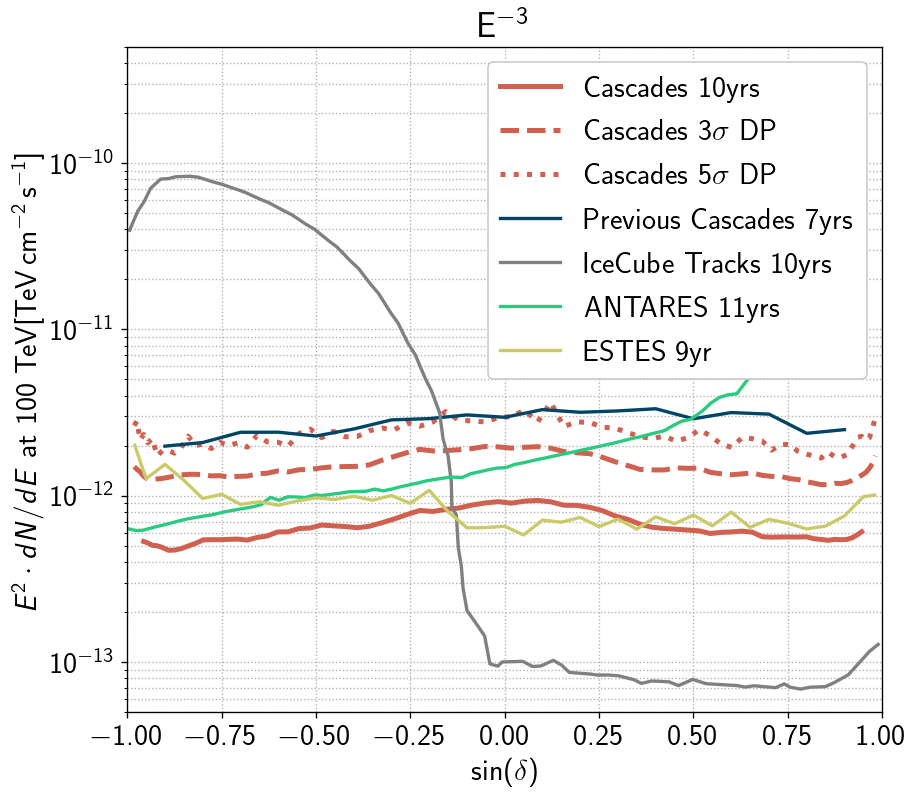

In [20]:
mpl.rc('font', size=18) 
fig, ax1 = plt.subplots (1, figsize=(8,7)) 

ax1.semilogy(sorted(np.sin(np.radians(E3_decs[8:-8]))), E3_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')
ax1.semilogy(sorted(np.sin(np.radians(E3_decs_dp3_nofit[1:]))), E3_fluxs_dp3_nofit[1:], 
             ls = '--', c=soft_colors[1], lw=3, label='Cascades 3$\sigma$ DP')
ax1.semilogy(sorted(np.sin(np.radians(E3_decs_dp5_nofit[1:]))), E3_fluxs_dp5_nofit[1:], 
             ls = ':', c=soft_colors[1], lw=3, label='Cascades 5$\sigma$ DP')

sd_m, phi_m = repo.get_performance('sens_E300_MESE')[:2]
ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

#ax1.semilogy(sorted(np.sin(np.radians(E3_sysdecs[4:-4]))), E3_sysfluxs[4:-4], 
#            ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
sd = tracks['sindec']
E2dNdE = tracks['E2dNdE']
ax1.semilogy (sd, E2dNdE, label=r'IceCube Tracks 10yrs', color='grey', ls='-')

antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax1.semilogy(sd, e2dnde,  label=r'ANTARES 11yrs', color=soft_colors[2],lw=2,  ls='-')

ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)
if preliminary == True:
    ax1.text(-.9, .7e-13, r'\textbf{IceCube Preliminary}', c='r')
ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='both')
ax1.set_ylim (.5e-13, 5e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-3}$')
plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E300_no_sources')

-> /home/ssclafani/public_html/DNNCASACDE/plots/ps_sens/ps_sens_E200_E300_combined


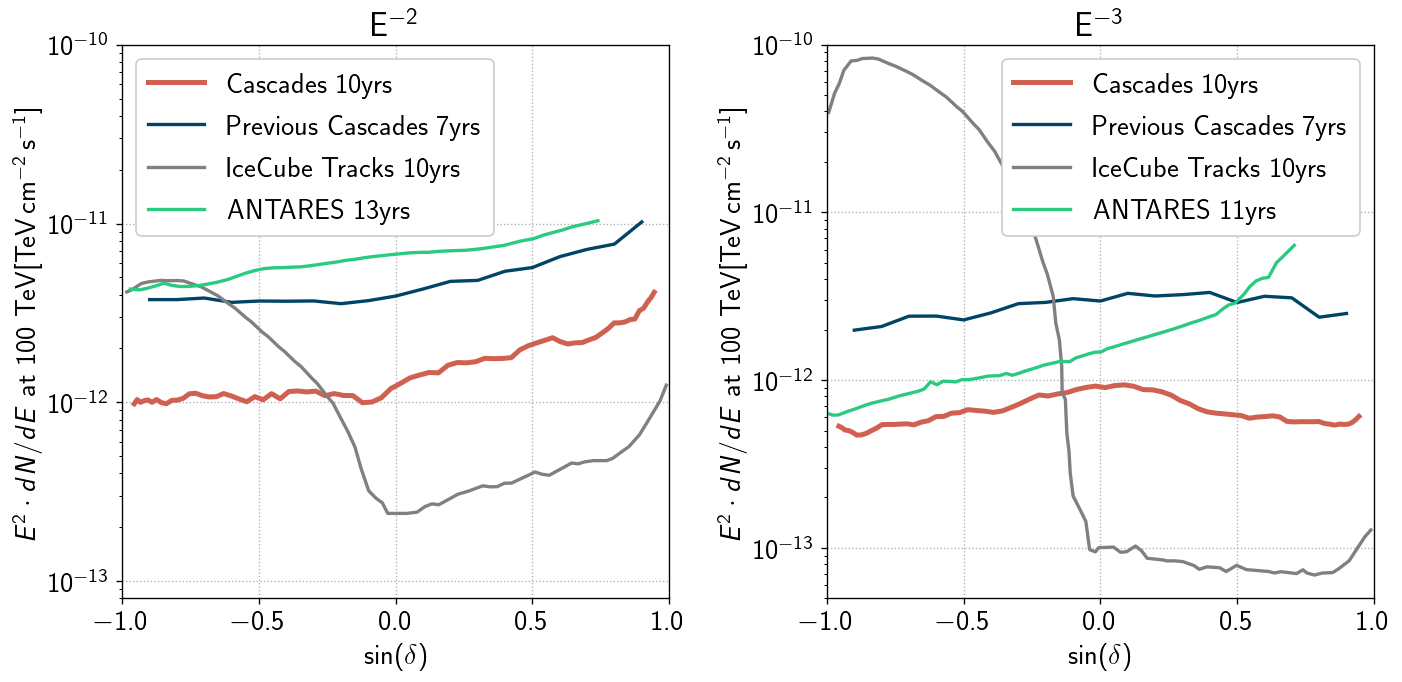

In [21]:
mpl.rc('font', size=17) 
fig, (ax1, ax2) = plt.subplots (1, 2, figsize=(12,6)) 
sd_m, phi_m = repo.get_performance('sens_E200_MESE')[:2]
ax1.semilogy(sorted(np.sin(np.radians(E2_decs[8:-8]))), E2_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')

ax1.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

sd, phi = repo.get_performance ('sens_E200_ps10_current')[:2]
ax1.semilogy (sd_t, tracks_flux_E2, label=r'IceCube Tracks 10yrs', color='grey', ls='-')

ax1.semilogy (sd_a, phi_a /1e3, label=r'ANTARES 13yrs', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES-9yr', color=soft_colors[4], lw=2)

ax1.set_xlabel (r'$\sin(\delta)$')
ax1.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax1.set_xlim (-1, 1)
ax1.grid(which='major')
ax1.set_ylim (.8e-13, 1e-10)
ax1.legend (ncol=1)
ax1.set_title('E$^{-2}$')



ax2.semilogy(sorted(np.sin(np.radians(E3_decs[8:-8]))), E3_fluxs[8:-8], 
             ls = '-', c=soft_colors[1], lw=3, label='Cascades 10yrs')

sd_m, phi_m = repo.get_performance('sens_E300_MESE')[:2]
ax2.semilogy (sd_m, phi_m,lw=2, c=soft_colors[0],  label=r'Previous Cascades 7yrs')

#ax1.semilogy(sorted(np.sin(np.radians(E3_sysdecs[4:-4]))), E3_sysfluxs[4:-4], 
#            ls = ':', c=soft_colors[1], lw=3, label='Systematics FullRange')
tracks = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/10yr_sens_E300.pickle')
sd = tracks['sindec']
E2dNdE = tracks['E2dNdE']
ax2.semilogy (sd, E2dNdE, label=r'IceCube Tracks 10yrs', color='grey', ls='-')


antares_sens = pd.read_pickle('/data/user/ssclafani/data/analyses/catalogs/antares_sens_E300.pickle')
sd = antares_sens['sindec']
e2dnde = antares_sens['E2dNdE']
ax2.semilogy(sd, e2dnde,  label=r'ANTARES 11yrs', color=soft_colors[2],lw=2,  ls='-')

#ax1.semilogy(estes_sd, estes_E2dNdE, label='ESTES 9yr', color=soft_colors[4], lw=2)
if preliminary == True:
    ax1.text(-.9, .7e-13, r'\textbf{IceCube Preliminary}', c='r')
ax2.set_xlabel (r'$\sin(\delta)$')
ax2.set_ylabel (
    r'$E^2\cdot dN/dE$'
    r' at 100 TeV'
    r'[$\textsf{TeV}\,\textsf{cm}^{-2}\,\textsf{s}^{-1}]$')
ax2.set_xlim (-1, 1)
ax2.grid(which='major')
ax2.set_ylim (.5e-13, 1e-10)
ax2.legend (ncol=1)
ax2.set_title('E$^{-3}$')

plt.tight_layout()

cy.plotting.saving(plot_dir, 'ps_sens_E200_E300_combined')